In [88]:
#Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'




In [ ]:
url = "https://www.fantasyfootballdatapros.com/api/players/"
years = list(range(2010, 2020))

player_name = []
position = []
season = []
games_played = []
fumbles = []
interceptions = []
passing_yds = []
receptions = []
receiving_yds = []
rushing_yds = []
passing_tds = []
rushing_tds = []
receiving_tds = []
team = []

#fantasy = requests.get(url + '2019/all').json()
#print(json.dumps(fantasy, indent=4, sort_keys=True))

for year in years:
    query_url = url + str(year) + '/all'
    fantasy = requests.get(query_url).json()
    number_of_players = len(fantasy)
    
    for x in range(number_of_players):
        player_name.append(fantasy[x]['player_name'])
        team.append(fantasy[x]['team'])
        position.append(fantasy[x]['position'])
        season.append(year)
        games_played.append(fantasy[x]['games_played'])
        fumbles.append(fantasy[x]['fumbles_lost'])
        interceptions.append(fantasy[x]['stats']['passing']['int'])
        passing_yds.append(fantasy[x]['stats']['passing']['passing_yds'])
        passing_tds.append(fantasy[x]['stats']['passing']['passing_td'])
        rushing_yds.append(fantasy[x]['stats']['rushing']['rushing_yds'])
        rushing_tds.append(fantasy[x]['stats']['rushing']['rushing_td'])
        receptions.append(fantasy[x]['stats']['receiving']['receptions'])
        receiving_yds.append(fantasy[x]['stats']['receiving']['receiving_yds'])
        receiving_tds.append(fantasy[x]['stats']['receiving']['receiving_td'])
    
player_dict = {
    'Player Name' : player_name,
    'Team': team,
    'Position': position,
    'Season': season,
    'Games Played': games_played,
    'Fumbles': fumbles,
    'Interceptions': interceptions,
    'Passing Yards': passing_yds,
    'Passing TDs':passing_tds,
    'Rushing Yards':rushing_yds,
    'Rushing TDs':rushing_tds,
    'Receptions':receptions,
    'Receiving Yards':receiving_yds,
    'Receiving TDs':receiving_tds
}
    
players = pd.DataFrame(player_dict)


#Calculating Season point totals
players['Half PPR Points Season Total'] = (
    (players['Passing Yards']*0.04) + (players['Passing TDs'] * 4) - (players['Interceptions'] * 2)+
    (players['Rushing Yards']*.1) + (players['Rushing TDs'] * 6) - (players['Fumbles'] * 2) + 
    (players['Receptions'] * 0.5) + (players['Receiving Yards'] * .1) + (players['Receiving TDs'] * 6)
    )





In [72]:
#Breaking up dataframe into smaller dataframes of individual positions
qb_data = players[players['Position'] == 'QB']
rb_data = players[players['Position'] == 'RB']
wr_data = players[players['Position'] == 'WR']
te_data = players[players['Position'] == 'TE']

#list of position dataframes for for loops below
data_list = [qb_data, rb_data, wr_data, te_data]


#Dictionaries that will be used to store total points for top ranked players at each position over the years
qb_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
}

rb_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
    13 : 0,
    14 : 0,
    15 : 0,
    16 : 0,
    17 : 0, 
    18 : 0,
    19 : 0,
    20 : 0,
    21 : 0,
    22 : 0,
    23 : 0,
    24 : 0   
}

wr_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
    13 : 0,
    14 : 0,
    15 : 0,
    16 : 0,
    17 : 0, 
    18 : 0,
    19 : 0,
    20 : 0,
    21 : 0,
    22 : 0,
    23 : 0,
    24 : 0
    
}

te_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,  
}

#list of dictionaries to be used in for loop
positions = [qb_rank_points, rb_rank_points, wr_rank_points, te_rank_points]

#for loop that will go through every year, then go through qb, rb, wr, and te to
#sort by the most total season points scored

for year in years:
    for x in range(4):
        temp_df = data_list[x][data_list[x]['Season'] == year]
        temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
        temp_df.reset_index(inplace = True, drop = True)
        
#This section below takes the number 1-12 or 1-24 of each position for every year and sums 
# all the number 1 ranked scores, the number 2 ranked scores, etc., leaving the totals in the
# dictionaries created earlier

        for y in range(1, 25):
            if y in positions[x]:
                positions[x][y] += temp_df._get_value(y - 1, 'Half PPR Points Season Total')

#This for loop takes the total sum of each rank and averages it, dividing by 10 because there are 10 years of data

for x in range(4):
    for y in range(1, 25):
        if y in positions[x]:
            positions[x][y] = positions[x][y] / 10
            



([<matplotlib.axis.XTick at 0x7fc0601c7220>,
 <a list of 12 Text major ticklabel objects>)

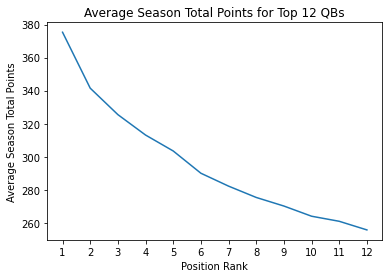

In [91]:
qb_ranks = pd.DataFrame(qb_rank_points, index=[0])

qb_ranks = qb_ranks.transpose()
qb_ranks

plt.plot(qb_ranks)
plt.ylabel('Average Season Total Points')
plt.xlabel('Position Rank')
plt.title('Average Season Total Points for Top 12 QBs')
plt.xticks(np.arange(1, 13, step=1))